# Loading required libraries

In [1]:
import pandas as pd
import numpy as np
from outliers import smirnov_grubbs as grubbs
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [2]:
df = pd.read_csv("Dataset\Telecom_customer churn.csv")
df

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,S,U,U,U,Y,U,Y,773.0,1099996
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,N,U,U,Y,Y,Y,Y,835.0,1099997
99997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,U,Y,Y,U,U,U,N,433.0,1099998
99998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,S,U,U,U,U,U,N,75.0,1099999


# Set Index as CustomerID

In [3]:
df_ID = df.set_index('Customer_ID')
df_ID

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays
Customer_ID,,,,,,,,,,,,,,,,,,,,,
1000001,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,A,0.0,N,U,U,U,U,U,Y,361.0
1000002,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,A,0.0,Z,U,U,U,U,U,Y,240.0
1000003,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,A,0.0,N,U,Y,U,U,U,Y,1504.0
1000004,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,D,0.0,U,Y,U,U,U,U,Y,1812.0
1000005,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,O,0.0,I,U,U,U,U,U,Y,434.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,A,0.0,S,U,U,U,Y,U,Y,773.0
1099997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,A,0.0,N,U,U,Y,Y,Y,Y,835.0
1099998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,U,Y,Y,U,U,U,N,433.0


## Differentiating the features

In [4]:
Numerical=['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean',
       'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean',
       'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean',
       'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean',
       'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean',
       'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean',
       'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean',
       'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean',
       'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean',
       'complete_Mean', 'callfwdv_Mean', 'callwait_Mean',
       'totcalls', 'totmou', 'totrev', 'adjrev',
       'adjmou', 'adjqty', 'avgrev', 'avgmou', 'avgqty', 'avg3mou', 'avg3qty',
       'avg3rev', 'avg6mou', 'avg6qty', 'avg6rev', 'hnd_price']

Categorical =[ 'area','crclscod','dualband','ethnic','refurb_new','marital','new_cell']

Ordinal_Categorical = ['numbcars', 'actvsubs','months', 'phones','eqpdays','models','uniqsubs']

Boolean = ['asl_flag','truck','rv','forgntvl','creditcd' , 'kid0_2', 'kid11_15', 'kid16_17', 'kid3_5', 'kid6_10']

Target_Variable =[ 'churn']

categorical_filled_na = ['prizm_social_one','ownrent','infobase']

removed_high_na = [ 'dwllsize', 'HHstatin', 'dwlltype', 'lor', 'income', 'adults',  'hnd_webcap']
    
len(Numerical)+len(Categorical)+len(Ordinal_Categorical)+len(Boolean)+len(Target_Variable) + len(removed_high_na)+len(categorical_filled_na)


99

### Replace NaN in numbcars with 0 and in prizm_social_one, ownrent, infobase as UN - unknown

In [5]:
df_ID['numbcars'] = df_ID['numbcars'].fillna(0)

#Checking if its done


if df_ID['numbcars'].isna().sum() ==0:
    print("There are no missing values in 'numbcars' feature")
else:
    print("Some values are missing in 'numbcars' feature")

There are no missing values in 'numbcars' feature


In [6]:
#We rename the missing values in prizm_social_one, ownrent, infobase as UN - unknown

df_ID[['prizm_social_one','ownrent','infobase']] = df_ID[['prizm_social_one','ownrent','infobase']].fillna("UN")

# Removing missing values

### Removing rows with more than 3% Missing values

In [7]:
missing_per_ID = round((df_ID.isna().sum()/len(df_ID))*100,2)

#Sort the values from largest to smallest and display top 50 rows
df_mr = pd.DataFrame(missing_per_ID).sort_values(by=0, ascending=False).head(50)

missing_value_rows = df_mr[df_mr[0]<3].index.tolist()

In [8]:
df_r = df_ID.dropna(subset= missing_value_rows)
df_r

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays
Customer_ID,,,,,,,,,,,,,,,,,,,,,
1000001,23.997500,219.250000,22.50,0.2475,0.000000,0.000000,0.000000,0.00,0.00,-157.250000,...,A,0.0,N,U,U,U,U,U,Y,361.0
1000003,16.990000,10.250000,16.99,0.0000,0.000000,0.000000,0.000000,0.00,0.00,-4.250000,...,A,0.0,N,U,Y,U,U,U,Y,1504.0
1000004,38.000000,7.500000,38.00,0.0000,0.000000,0.000000,0.000000,0.00,0.00,-1.500000,...,D,0.0,U,Y,U,U,U,U,Y,1812.0
1000005,55.230000,570.500000,71.98,0.0000,0.000000,0.000000,0.000000,0.00,0.00,38.500000,...,O,0.0,I,U,U,U,U,U,Y,434.0
1000006,82.275000,1312.250000,75.00,1.2375,0.000000,0.000000,0.000000,0.00,0.00,156.750000,...,NaN,0.0,U,U,U,U,U,U,Y,458.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099982,34.990000,6.333333,44.99,0.0000,0.000000,0.000000,0.000000,0.00,0.00,-6.333333,...,A,0.0,N,U,U,Y,U,U,Y,118.0
1099985,85.150000,815.000000,87.99,0.0000,1.000000,0.390000,0.000000,0.39,0.39,0.000000,...,NaN,0.0,H,U,U,U,U,U,Y,230.0
1099986,71.993333,724.000000,70.00,0.0000,4.333333,1.083333,1.083333,0.00,0.91,-40.000000,...,NaN,0.0,S,U,U,U,U,U,Y,882.0


### Removing columns which have more than 3% missing values

In [9]:
missing_per_cols = round((df_r.isna().sum()/len(df_r))*100,2)

#Sort the values from largest to smallest and display top 50 rows
df_mc = pd.DataFrame(missing_per_cols).sort_values(by=0, ascending=False).head(50)

missing_cols = df_mc[df_mc[0]>3].index.tolist()
missing_cols

['dwllsize', 'HHstatin', 'dwlltype', 'lor', 'income', 'adults', 'hnd_webcap']

In [10]:
df_no_mv = df_r.drop(missing_cols,axis=1)
df_no_mv

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,numbcars,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays
Customer_ID,,,,,,,,,,,,,,,,,,,,,
1000001,23.997500,219.250000,22.50,0.2475,0.000000,0.000000,0.000000,0.00,0.00,-157.250000,...,3.0,0.0,N,U,U,U,U,U,Y,361.0
1000003,16.990000,10.250000,16.99,0.0000,0.000000,0.000000,0.000000,0.00,0.00,-4.250000,...,2.0,0.0,N,U,Y,U,U,U,Y,1504.0
1000004,38.000000,7.500000,38.00,0.0000,0.000000,0.000000,0.000000,0.00,0.00,-1.500000,...,1.0,0.0,U,Y,U,U,U,U,Y,1812.0
1000005,55.230000,570.500000,71.98,0.0000,0.000000,0.000000,0.000000,0.00,0.00,38.500000,...,1.0,0.0,I,U,U,U,U,U,Y,434.0
1000006,82.275000,1312.250000,75.00,1.2375,0.000000,0.000000,0.000000,0.00,0.00,156.750000,...,1.0,0.0,U,U,U,U,U,U,Y,458.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099982,34.990000,6.333333,44.99,0.0000,0.000000,0.000000,0.000000,0.00,0.00,-6.333333,...,0.0,0.0,N,U,U,Y,U,U,Y,118.0
1099985,85.150000,815.000000,87.99,0.0000,1.000000,0.390000,0.000000,0.39,0.39,0.000000,...,2.0,0.0,H,U,U,U,U,U,Y,230.0
1099986,71.993333,724.000000,70.00,0.0000,4.333333,1.083333,1.083333,0.00,0.91,-40.000000,...,0.0,0.0,S,U,U,U,U,U,Y,882.0


#### Check if any missing value is still present

In [11]:
#Checking if there is any missing value still left
missing_per_check = round((df_no_mv.isna().sum()/len(df_no_mv))*100,2)

pd.DataFrame(missing_per_check).sort_values(by=0, ascending=False).sum()
#zeros means that there are no missing values

0    0.0
dtype: float64

In [12]:
#Percentage of missing values removed

print('Percentage values removed from dataset = {0:.2f}%'.format(((df_ID.size-df_no_mv.size)/(df_ID.size))*100))

Percentage values removed from dataset = 12.75%


# Remove outliers from numerical values

#### List down the numerical columns

In [13]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = df_no_mv.select_dtypes(include=numerics)
df_num.columns

Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean',
       'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean',
       'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean',
       'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean',
       'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean',
       'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean',
       'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean',
       'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean',
       'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean',
       'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'churn', 'months',
       'uniqsubs', 'actvsubs', 'totcalls', 'totmou', 'totrev', 'adjrev',
       'adjmou', 'adjqty', 'avgrev', 'avg

#### Ther are still some categorical values which we should be removed from the list 


    'churn', 'months', 'phones','eqpdays','models', 'truck', 'rv', 'numbcars','forgntvl', 'actvsubs','uniqsubs'

In [14]:
df_num_final = df_num[['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean',
       'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean',
       'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean',
       'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean',
       'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean',
       'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean',
       'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean',
       'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean',
       'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean',
       'complete_Mean', 'callfwdv_Mean', 'callwait_Mean',
       'totcalls', 'totmou', 'totrev', 'adjrev',
       'adjmou', 'adjqty', 'avgrev', 'avgmou', 'avgqty', 'avg3mou', 'avg3qty',
       'avg3rev', 'avg6mou', 'avg6qty', 'avg6rev', 'hnd_price']]

### Calculating z score and removing values with z score more than 3

Z-scores can quantify the unusualness of an observation when your data follow the normal distribution. Z-scores are the number of standard deviations above and below the mean that each value falls. For example, a Z-score of 2 indicates that an observation is two standard deviations above the average while a Z-score of -2 signifies it is two standard deviations below the mean. A Z-score of zero represents a value that equals the mean.

To calculate the Z-score for an observation, take the raw measurement, subtract the mean, and divide by the standard deviation. Mathematically, the formula for that process is the following:

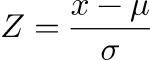

Z	=	standard score

x	=	observed value

μ =mean of the sample

σ =standard deviation of the sample


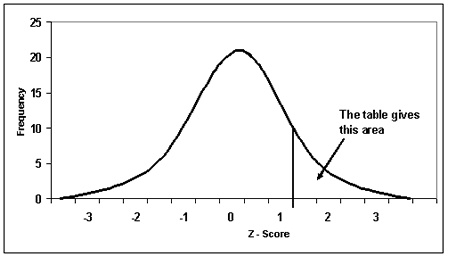

In [15]:
df_num_final = pd.DataFrame(df_num_final)
z = np.abs(stats.zscore(df_num_final))
df_num_zscore = df_num_final[(z < 4).all(axis=1)]
df_num_zscore

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,hnd_price
Customer_ID,,,,,,,,,,,,,,,,,,,,,
1000001,23.997500,219.250000,22.50,0.2475,0.000000,0.000000,0.000000,0.00,0.00,-157.250000,...,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,149.98999
1000003,16.990000,10.250000,16.99,0.0000,0.000000,0.000000,0.000000,0.00,0.00,-4.250000,...,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,29.98999
1000004,38.000000,7.500000,38.00,0.0000,0.000000,0.000000,0.000000,0.00,0.00,-1.500000,...,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,29.98999
1000005,55.230000,570.500000,71.98,0.0000,0.000000,0.000000,0.000000,0.00,0.00,38.500000,...,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,149.98999
1000007,17.145000,0.000000,16.99,0.0000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,...,58.95,334.06,120.60,0,0,17,0.0,0.0,17.0,29.98999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099982,34.990000,6.333333,44.99,0.0000,0.000000,0.000000,0.000000,0.00,0.00,-6.333333,...,40.02,195.17,43.96,116,23,36,203.0,39.0,37.0,99.98999
1099985,85.150000,815.000000,87.99,0.0000,1.000000,0.390000,0.000000,0.39,0.39,0.000000,...,70.53,339.86,73.76,482,106,93,536.0,93.0,96.0,199.98999
1099986,71.993333,724.000000,70.00,0.0000,4.333333,1.083333,1.083333,0.00,0.91,-40.000000,...,77.68,636.00,233.70,715,291,73,707.0,262.0,74.0,29.98999


Distrubution plot for the data

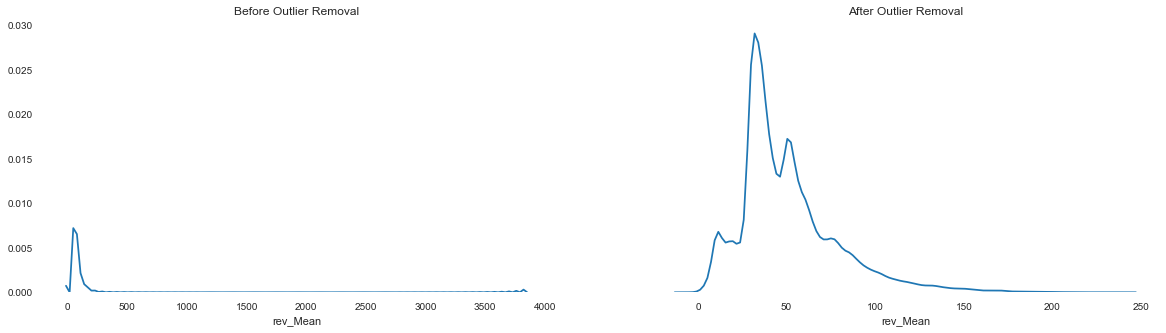

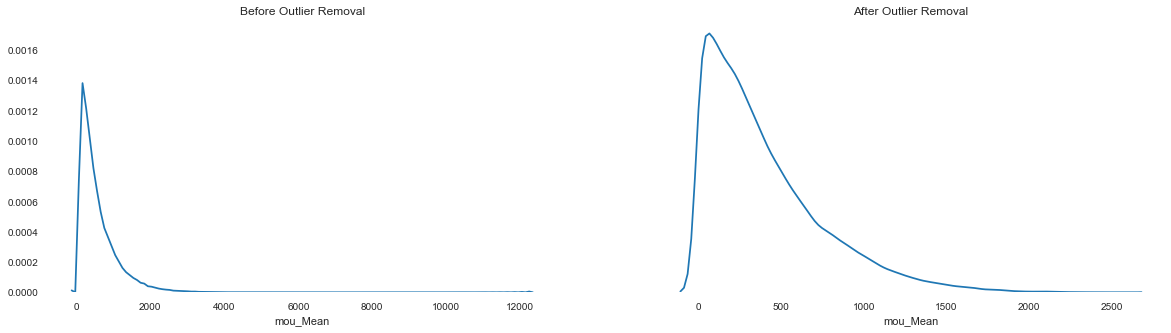

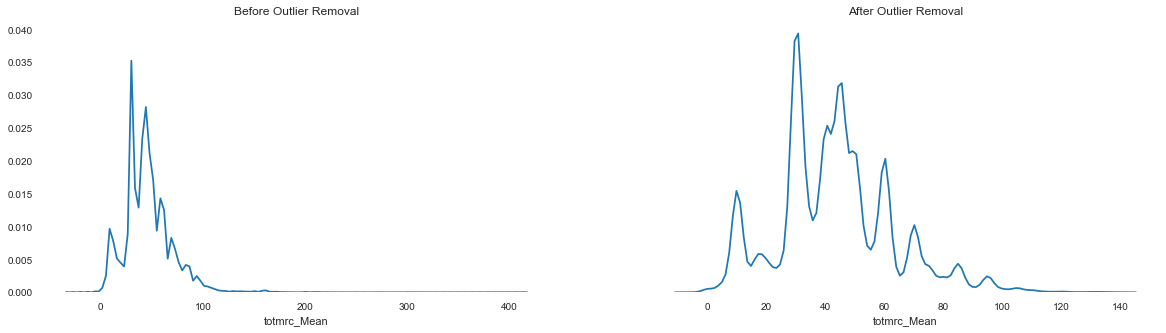

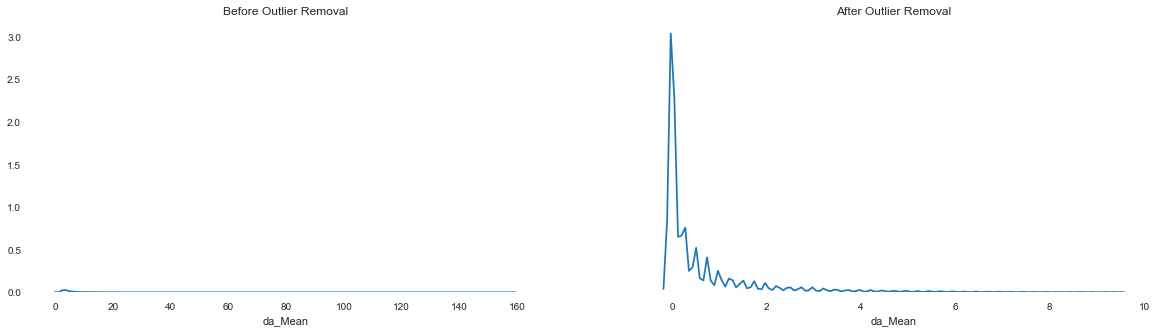

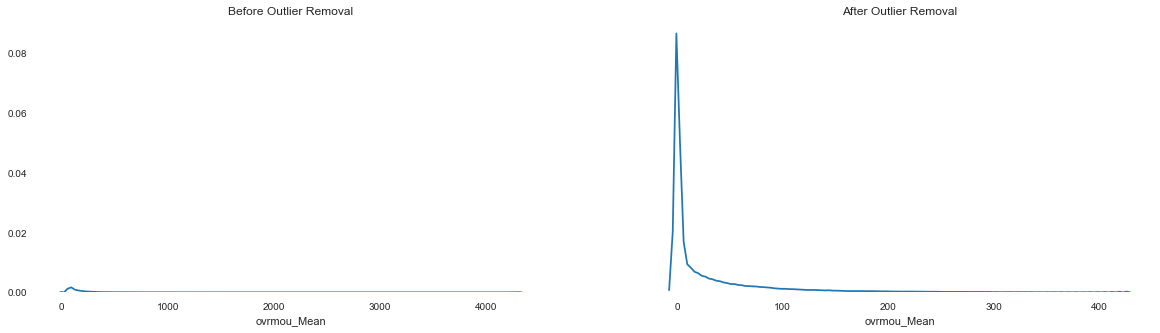

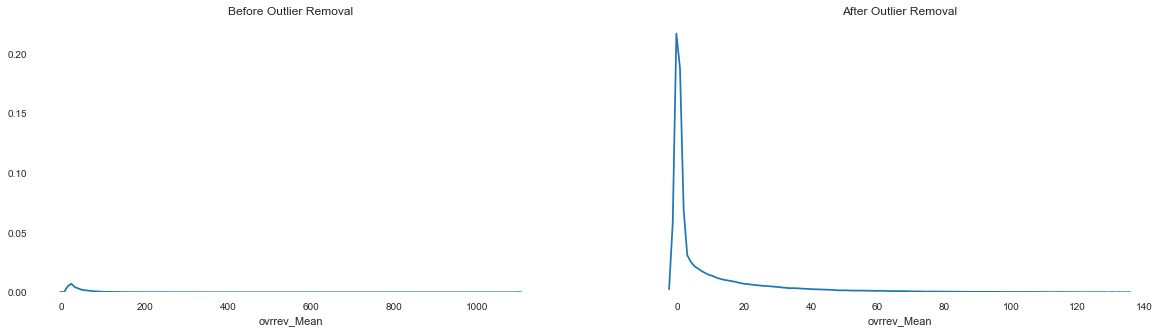

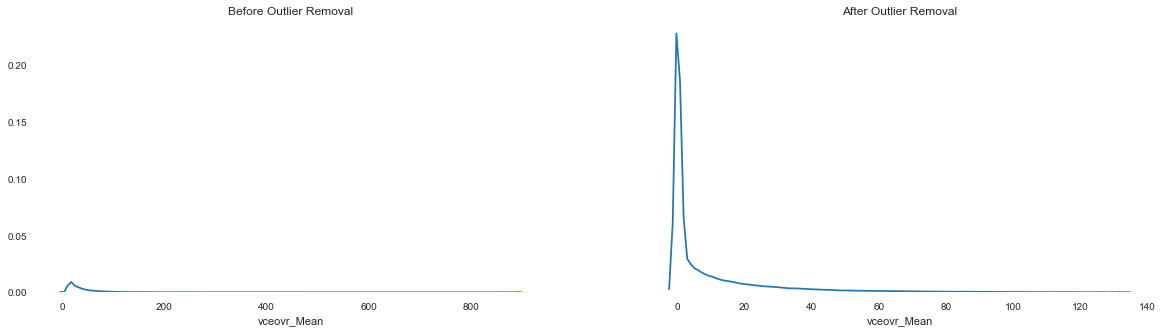

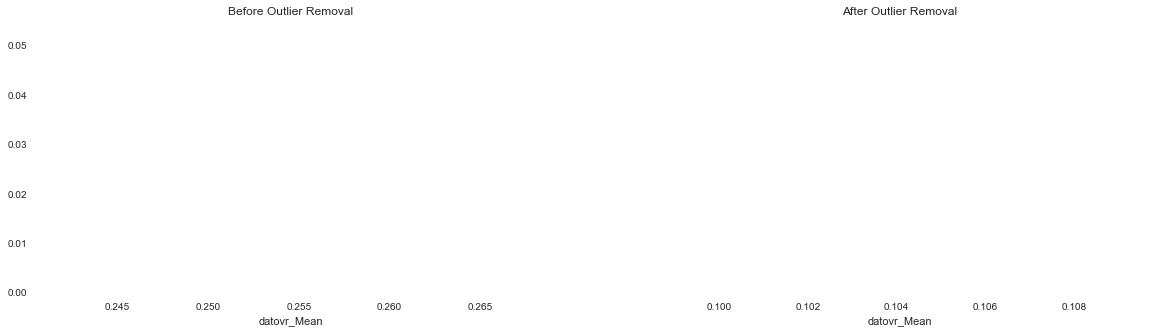

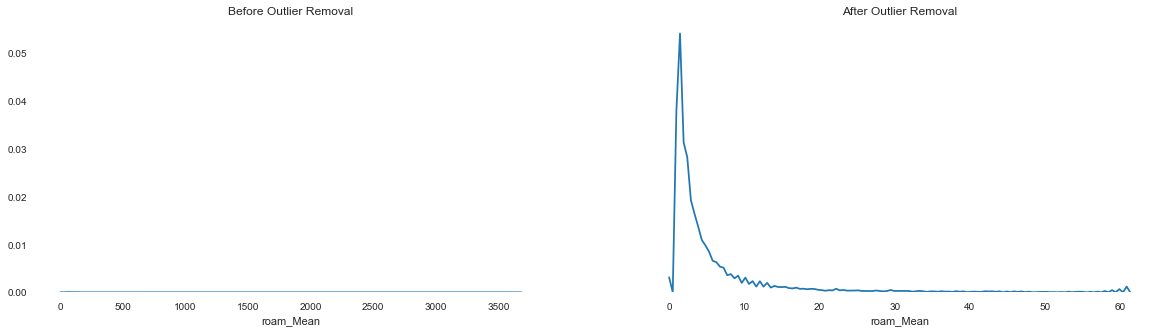

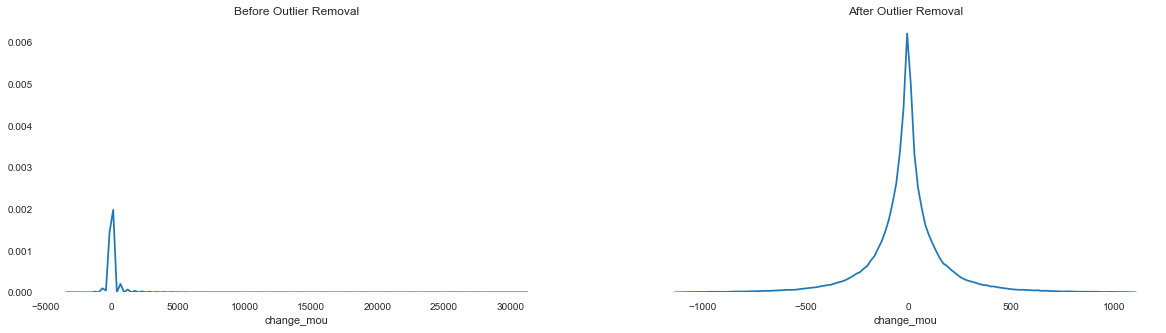

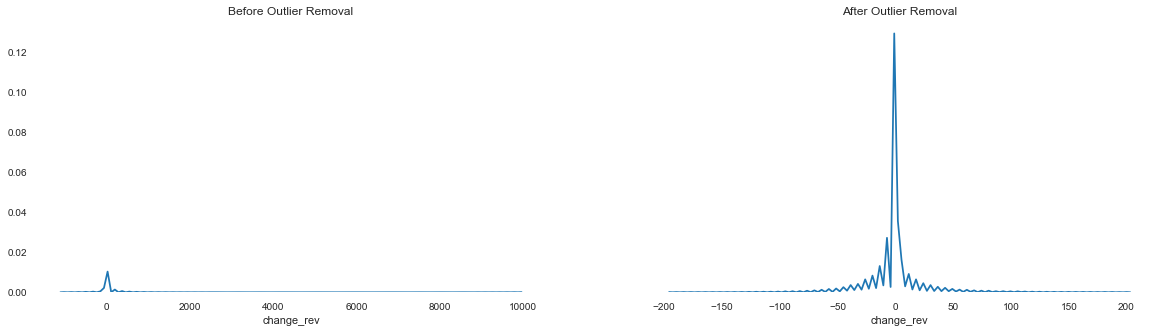

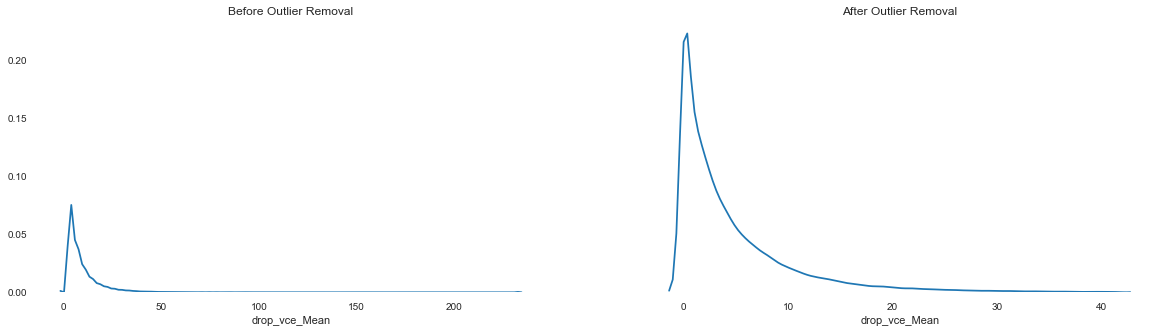

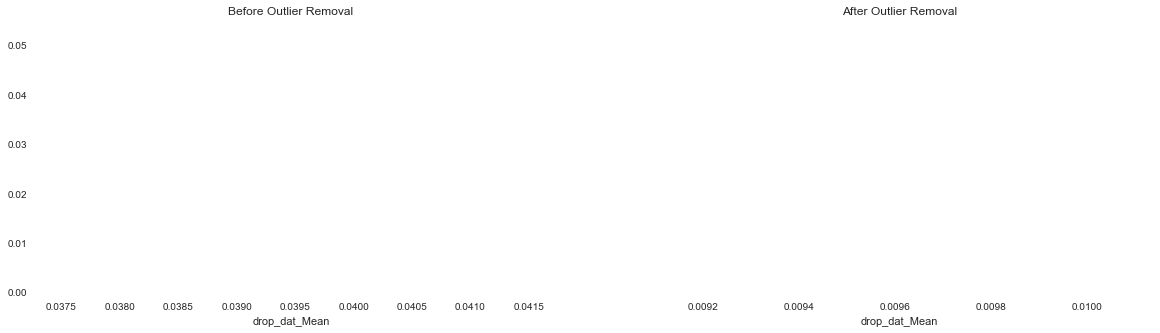

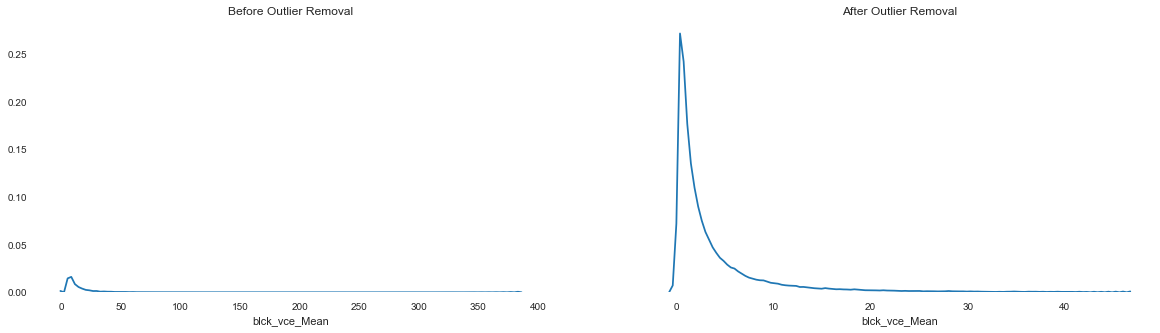

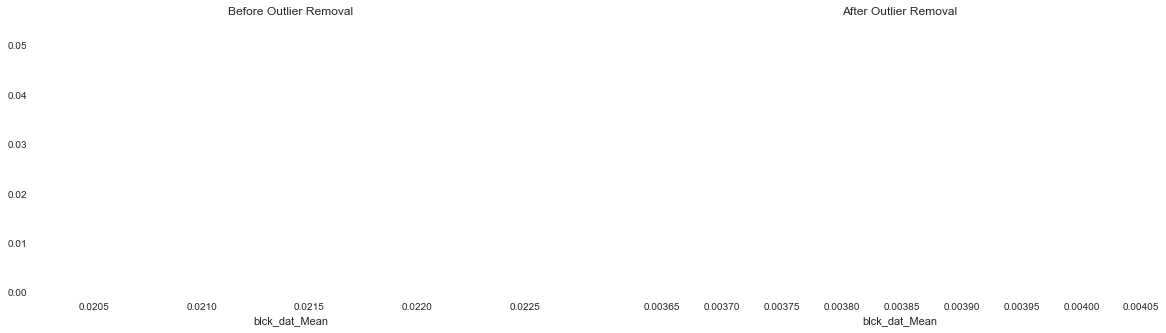

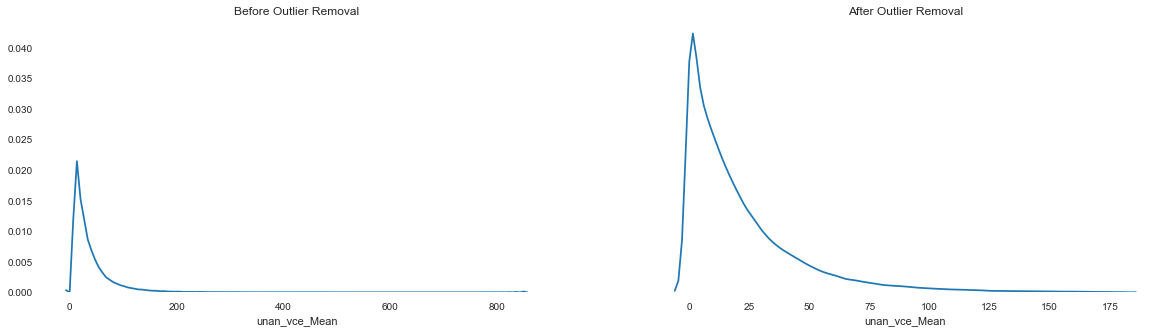

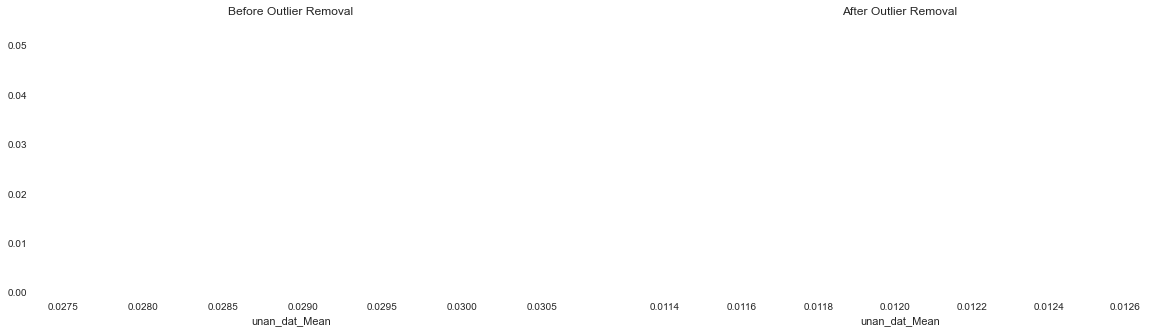

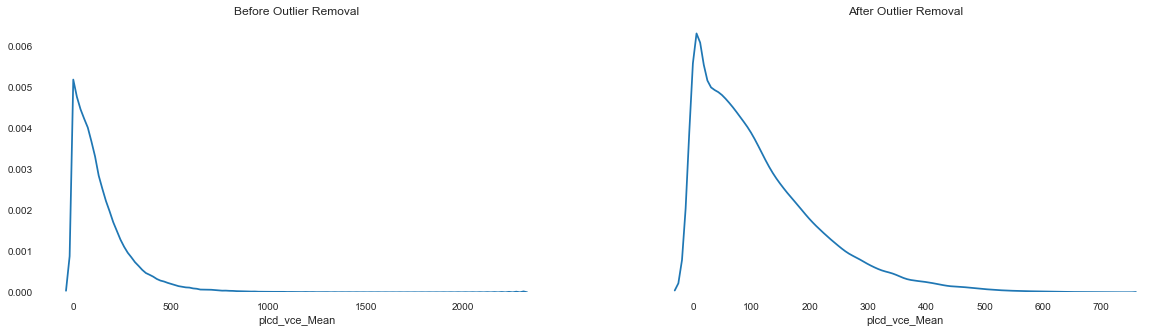

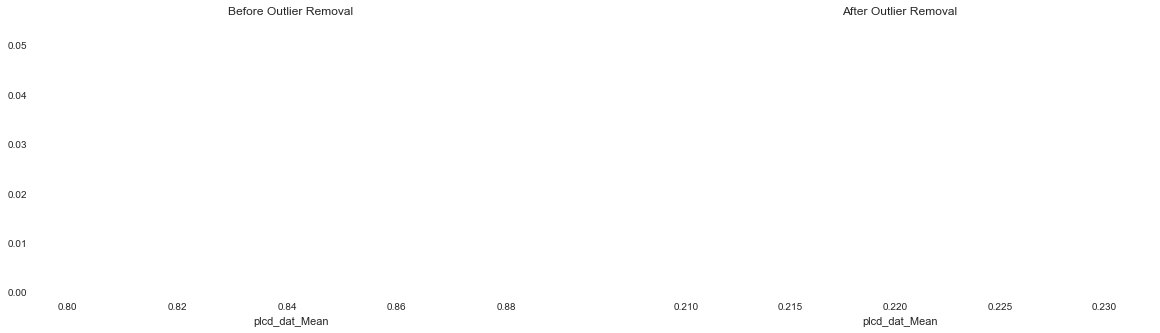

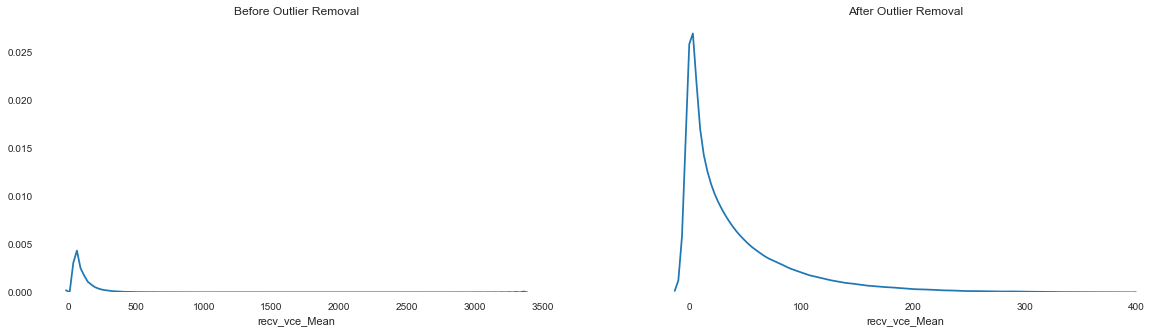

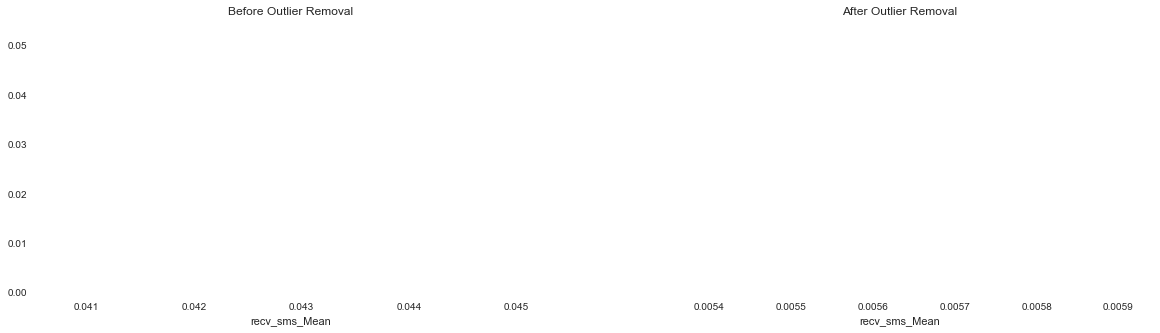

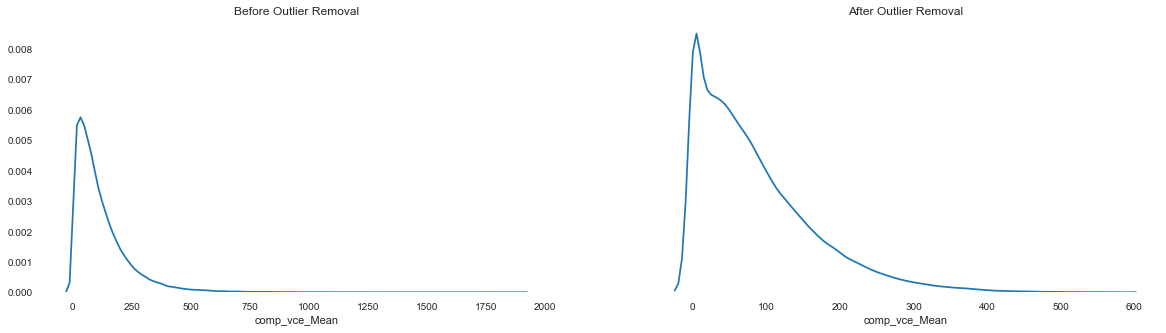

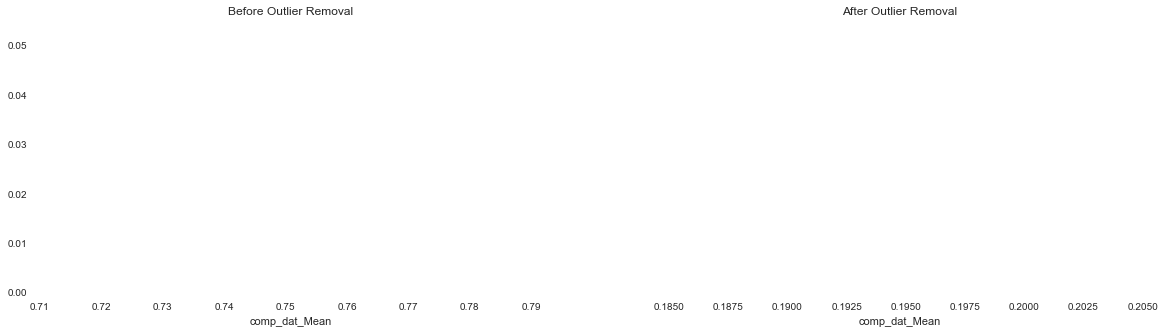

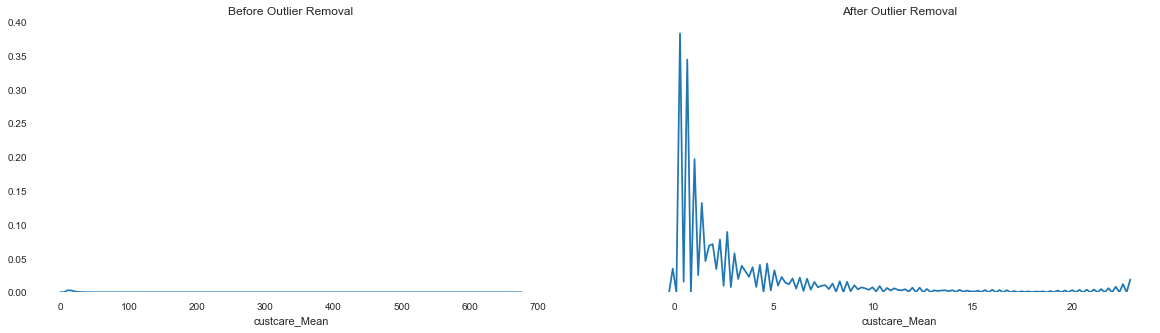

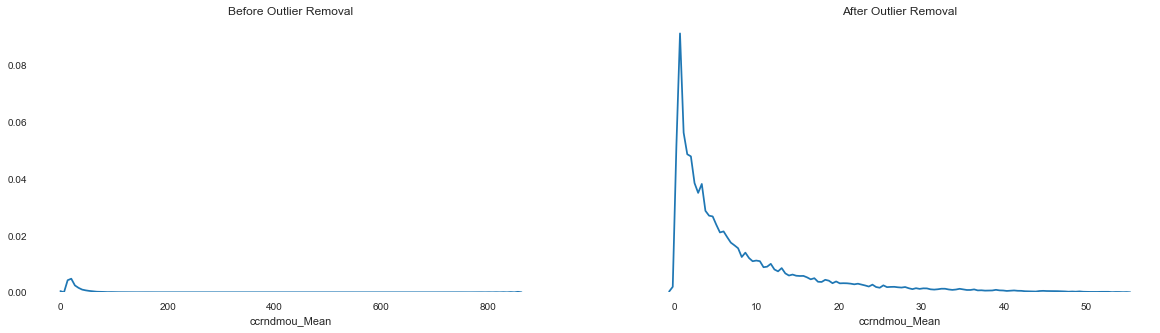

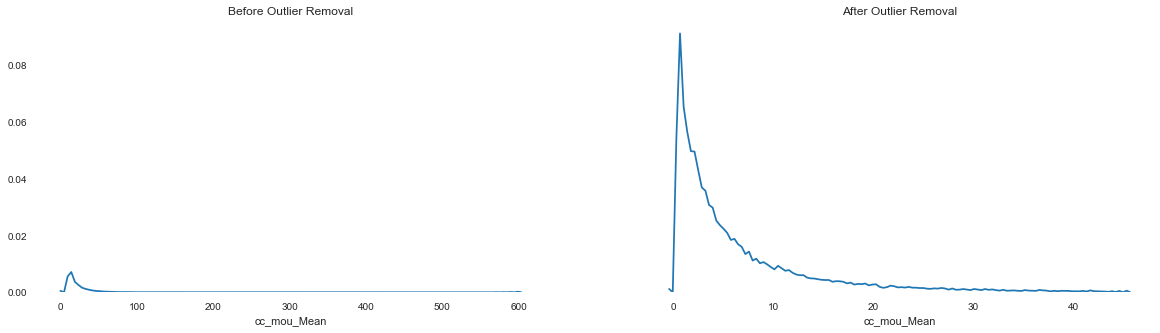

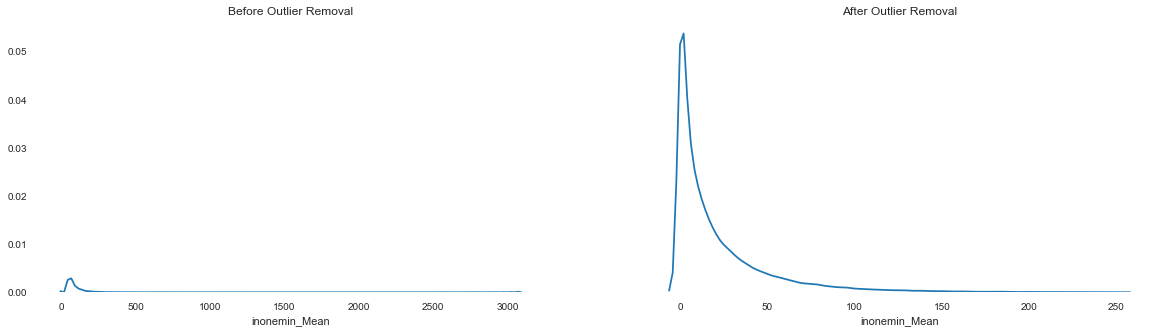

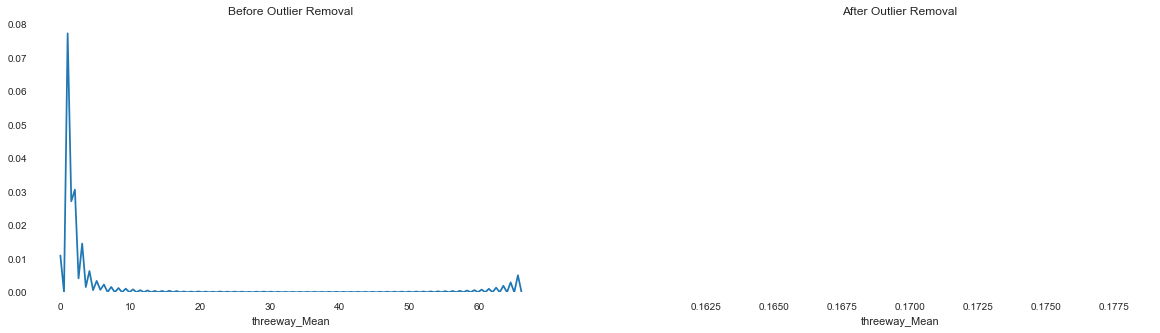

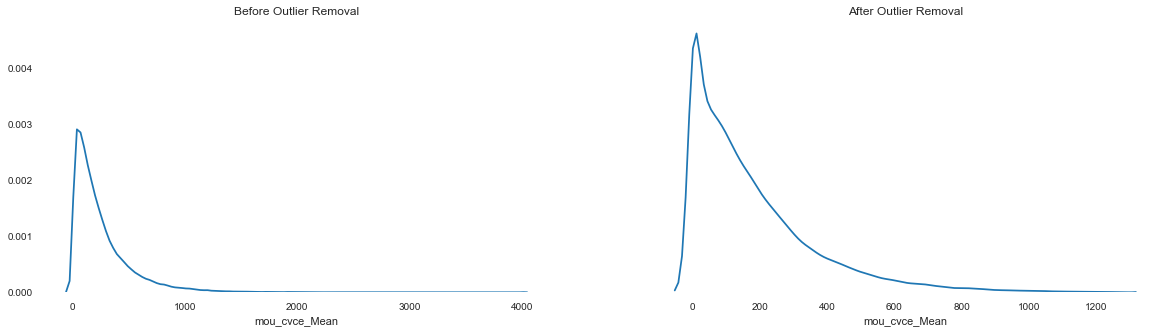

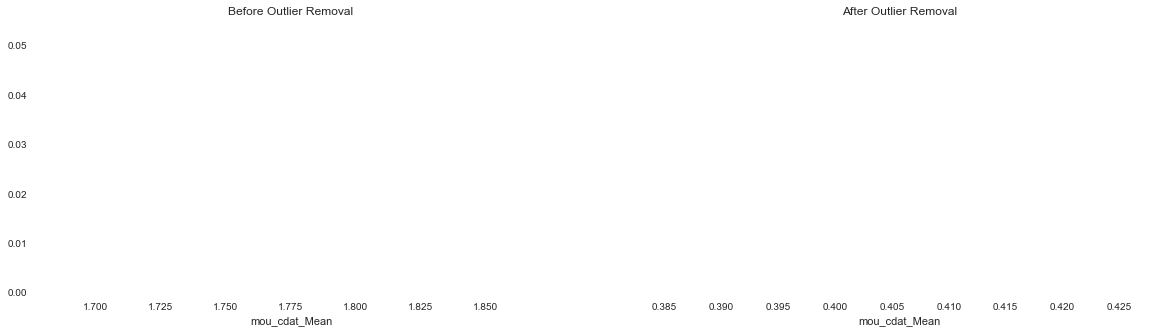

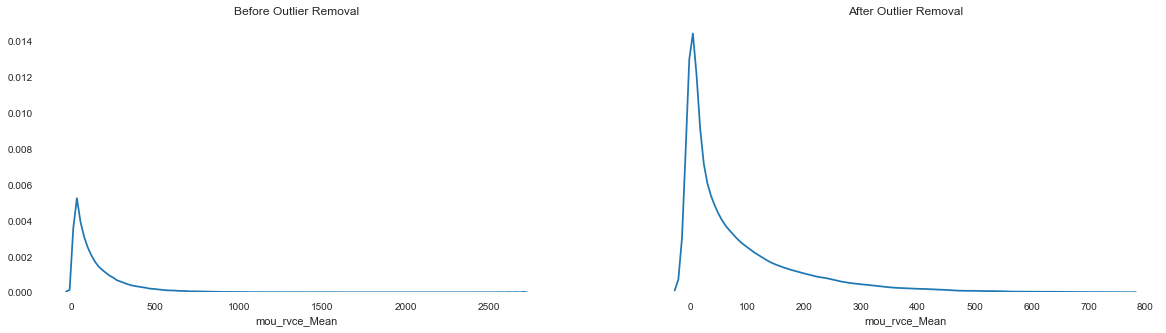

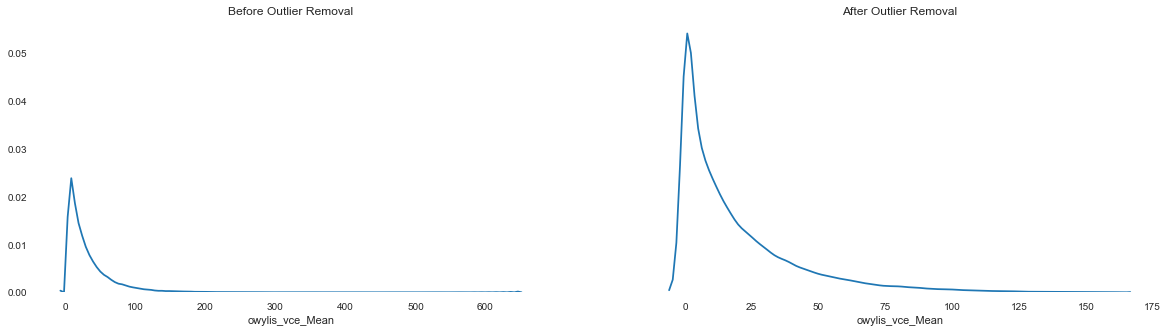

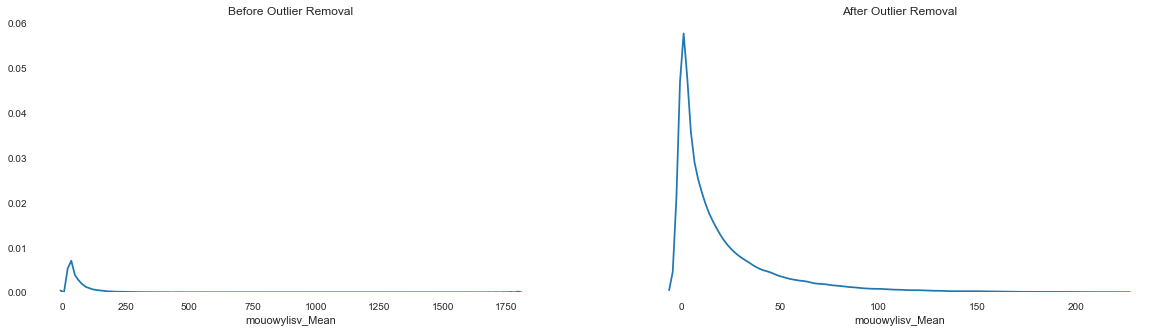

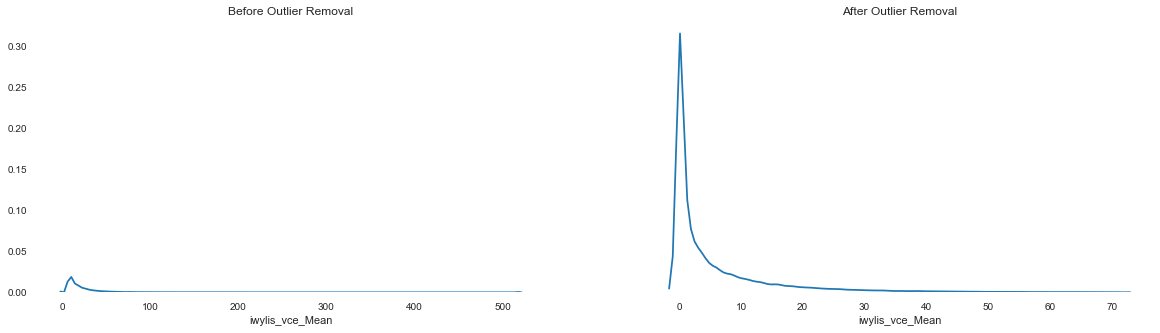

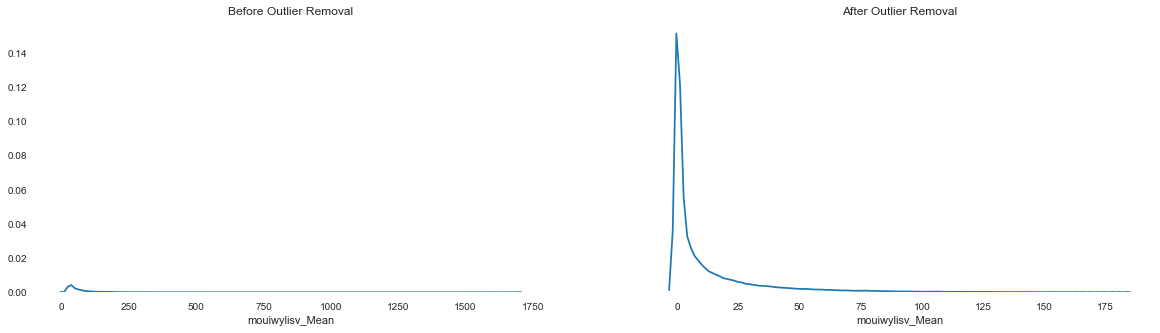

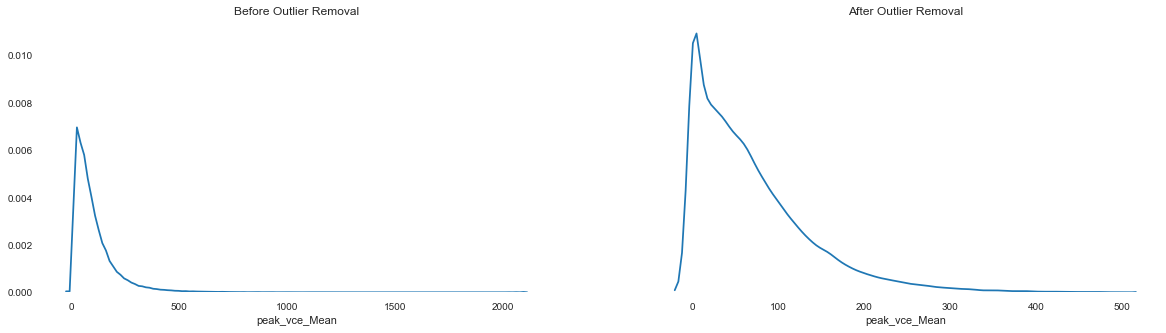

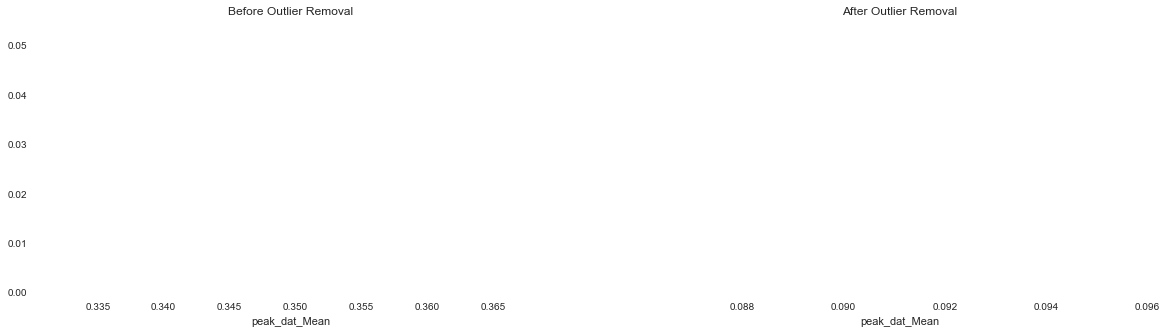

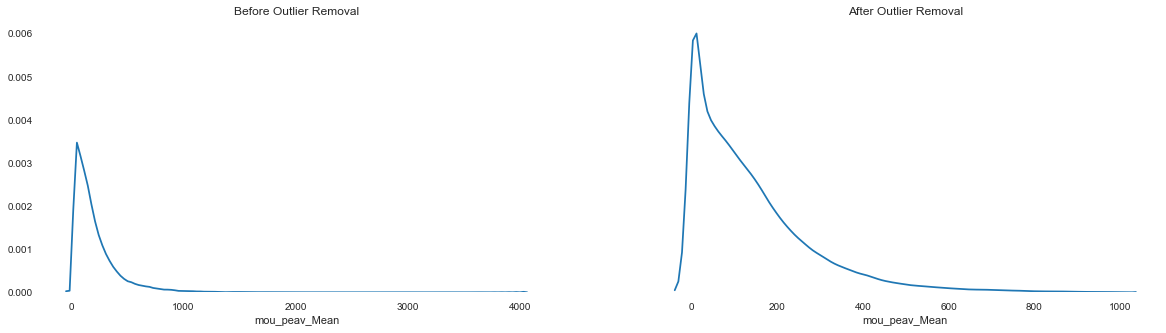

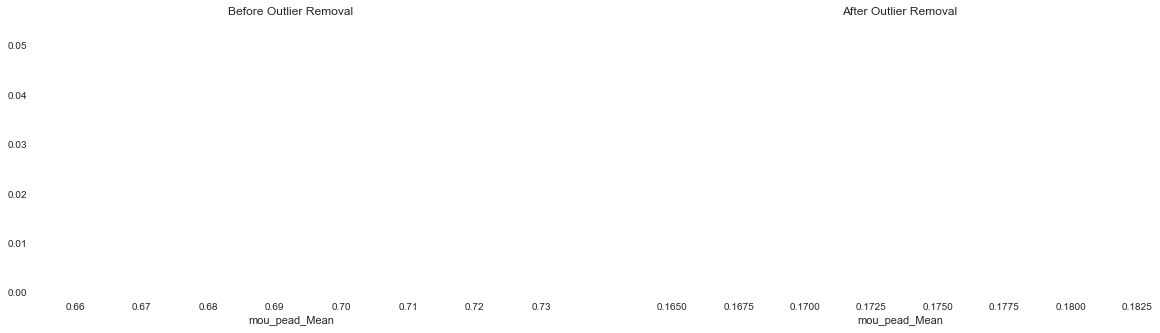

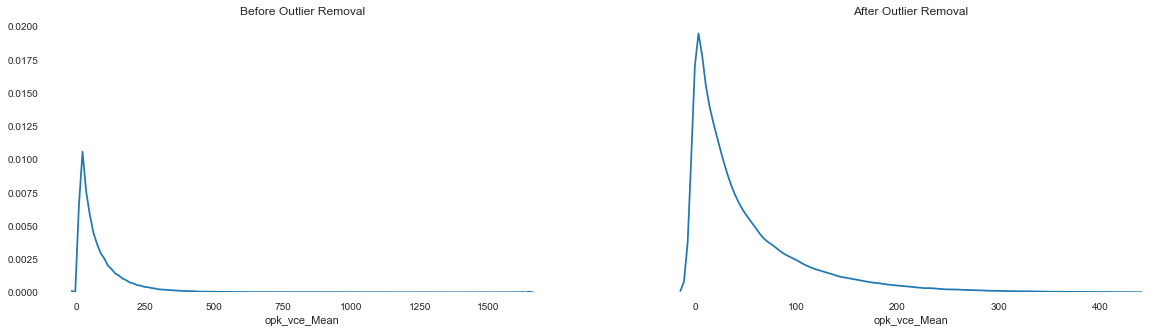

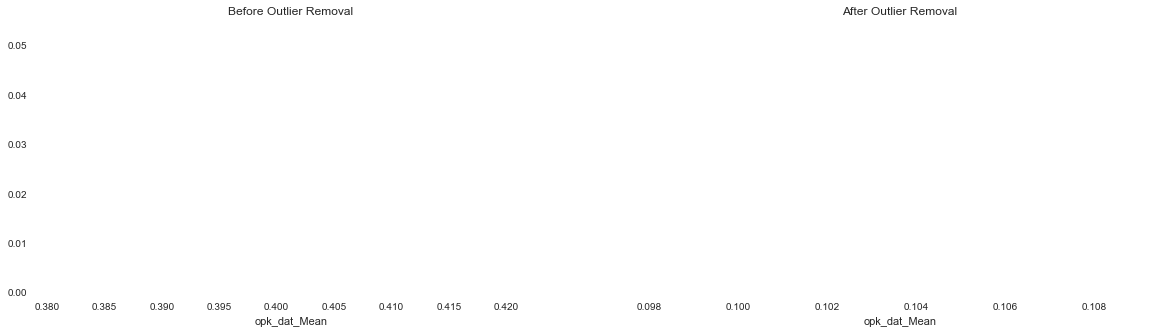

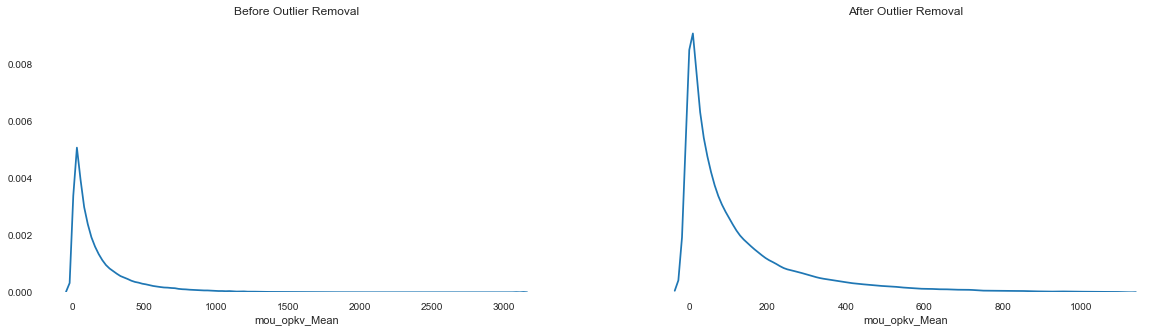

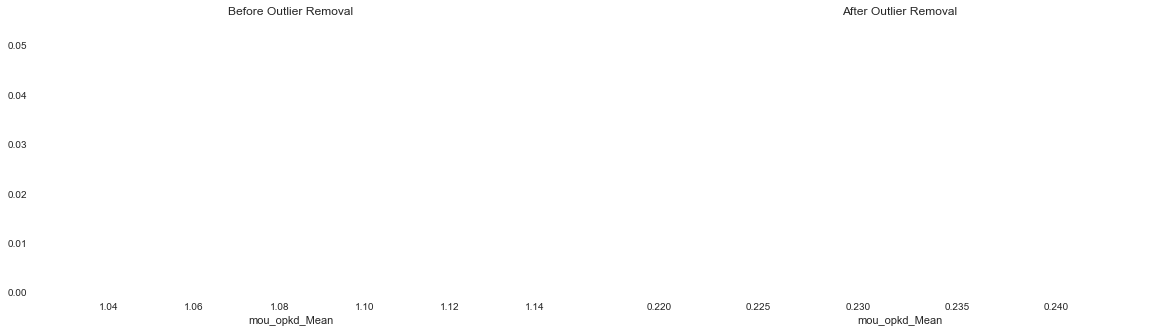

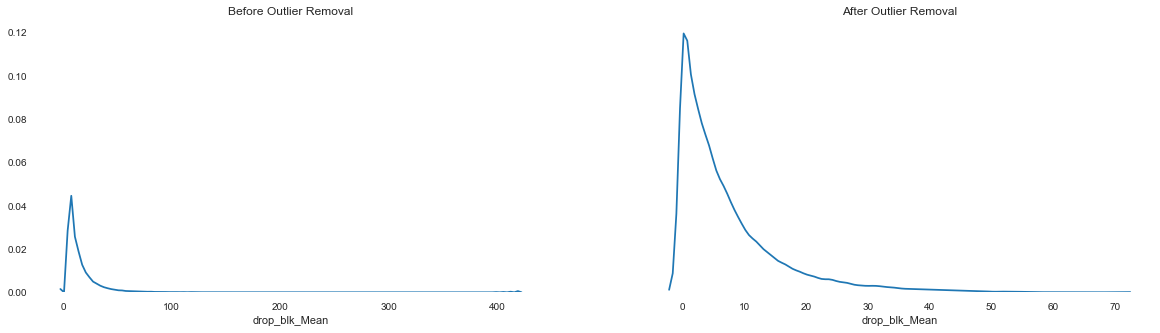

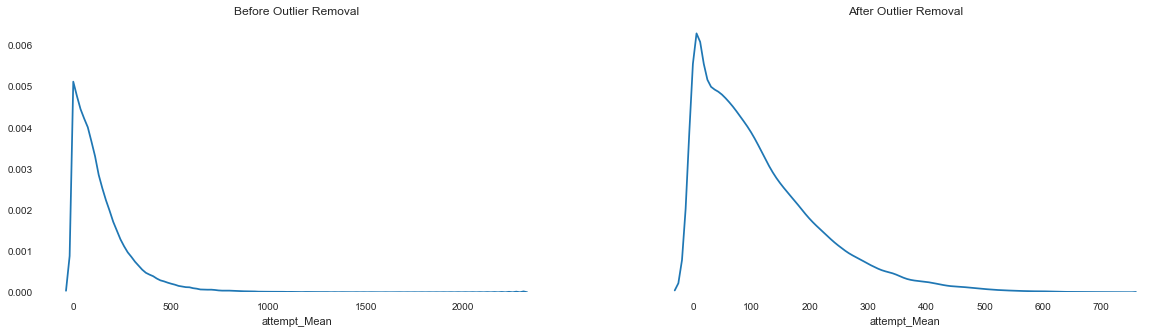

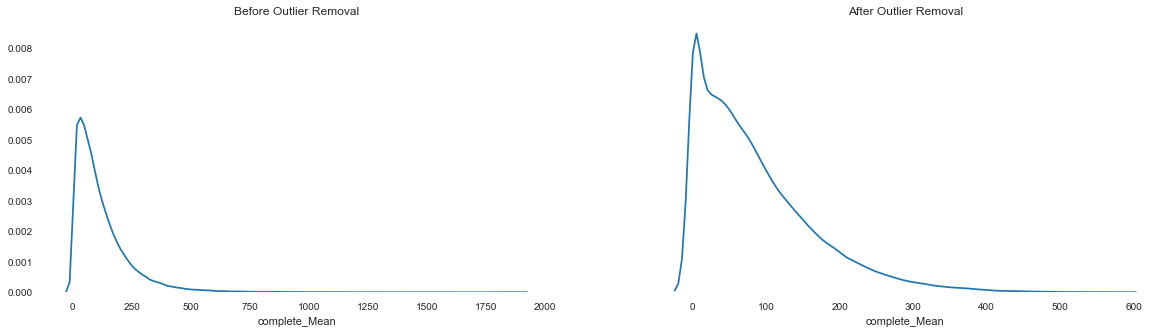

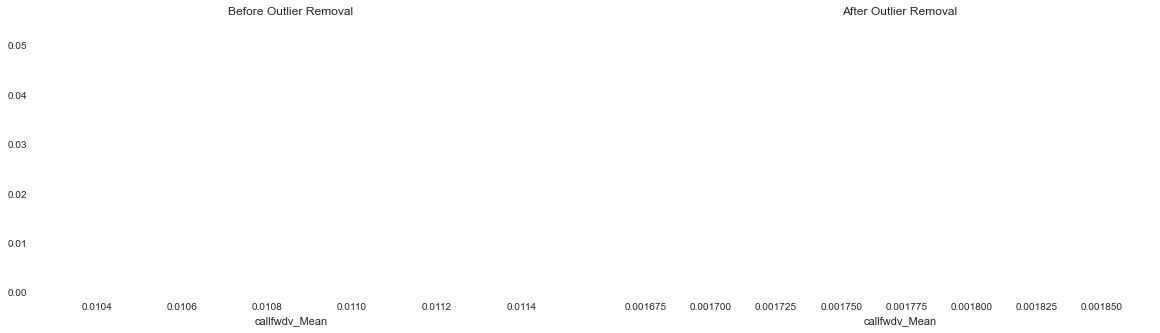

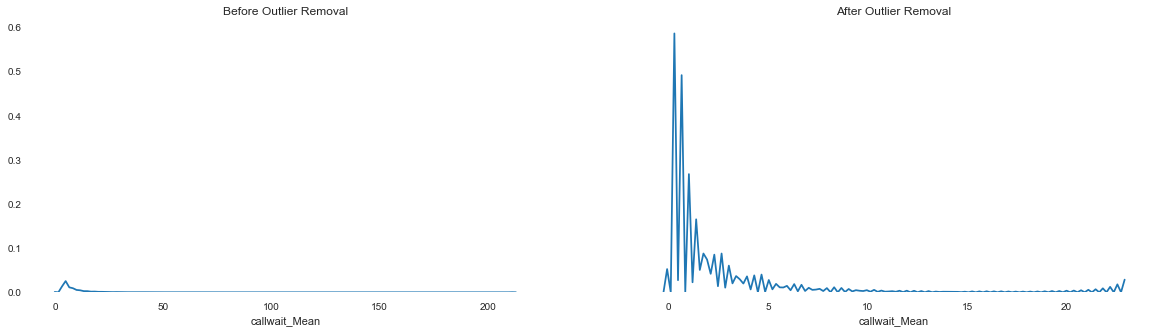

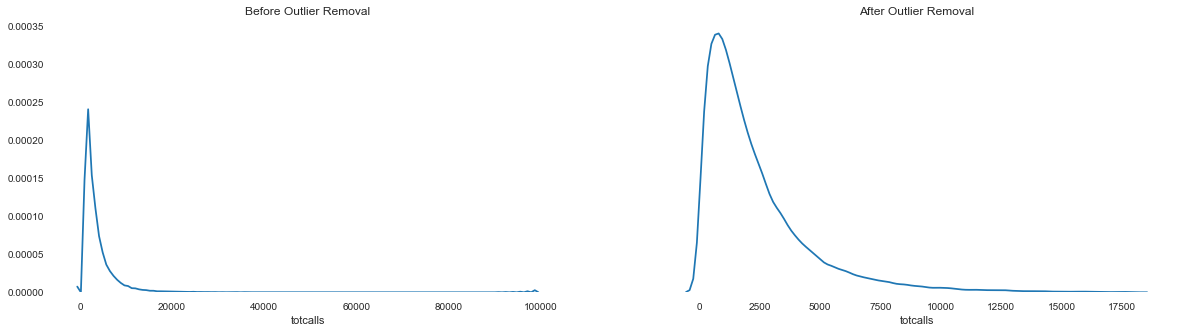

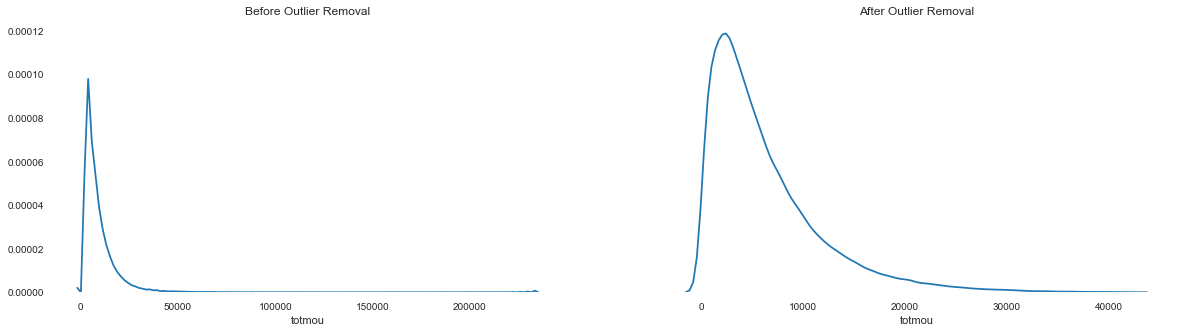

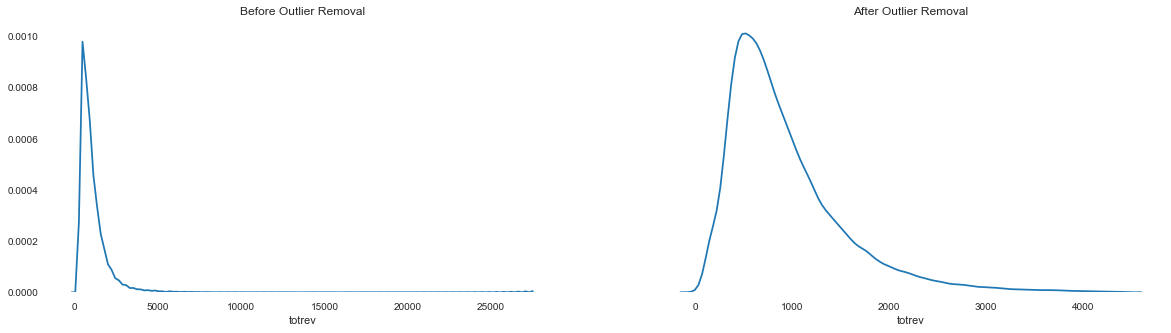

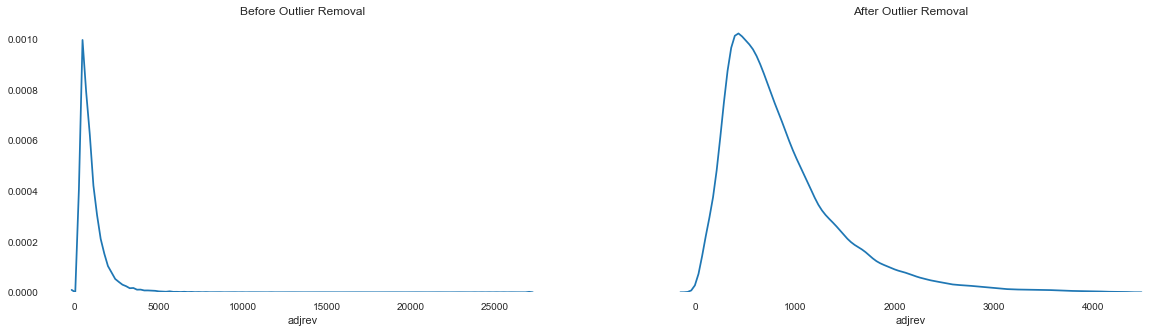

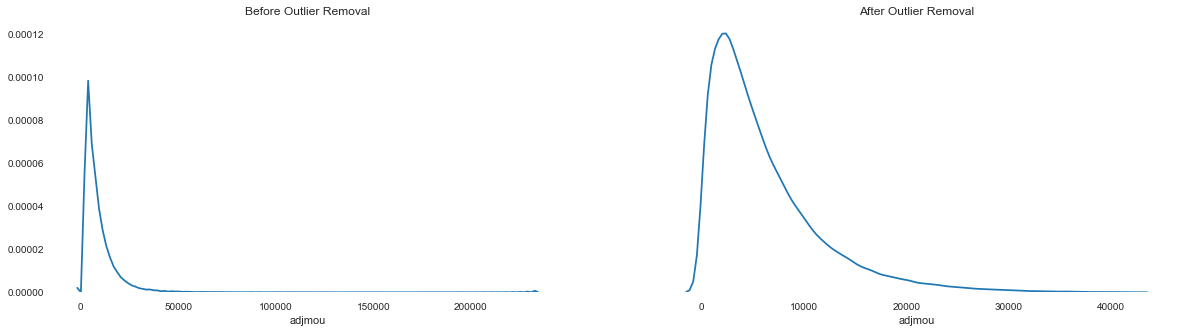

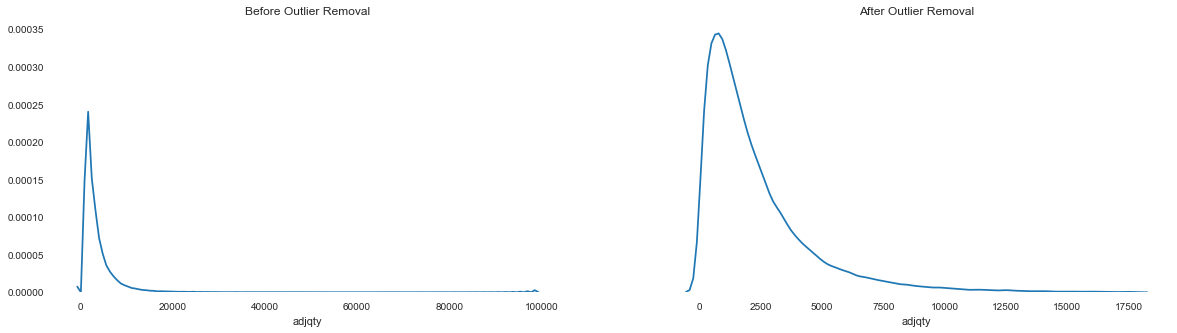

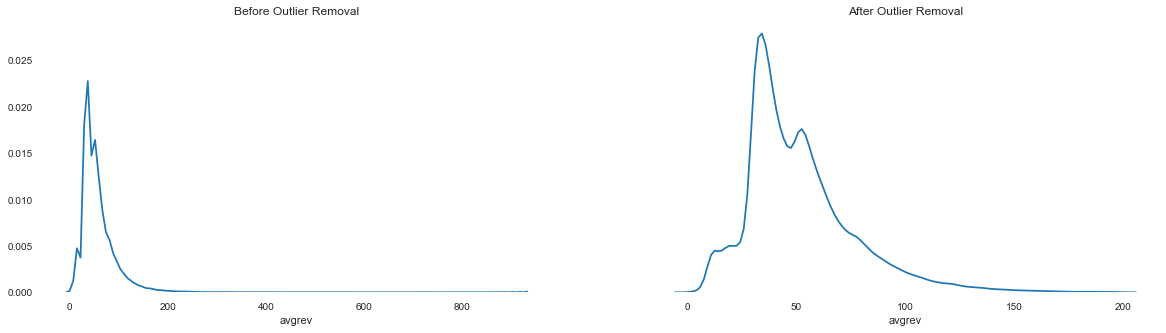

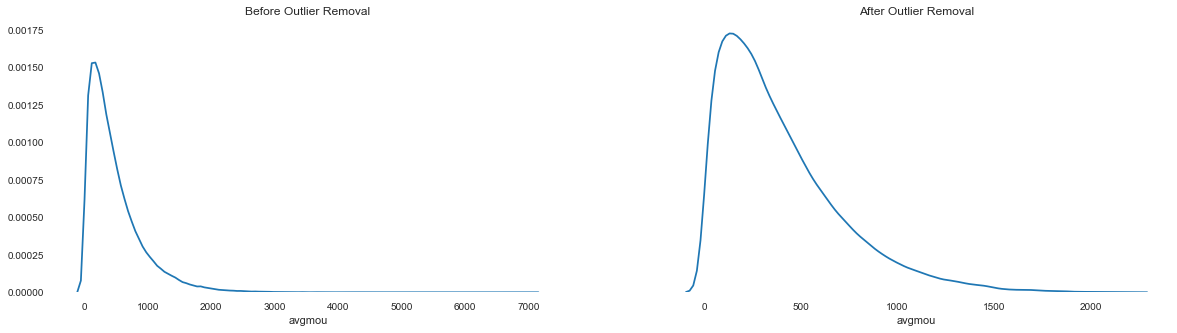

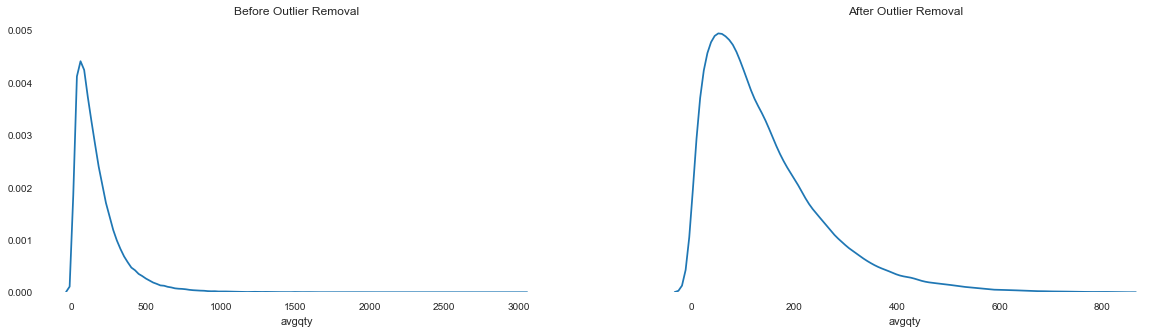

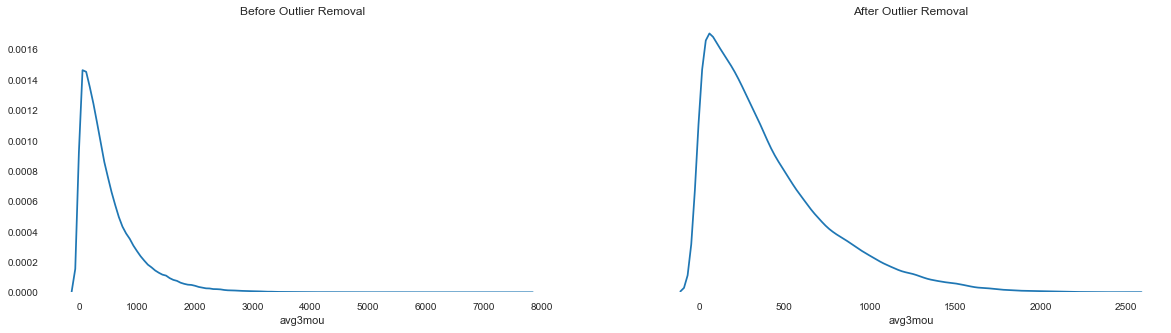

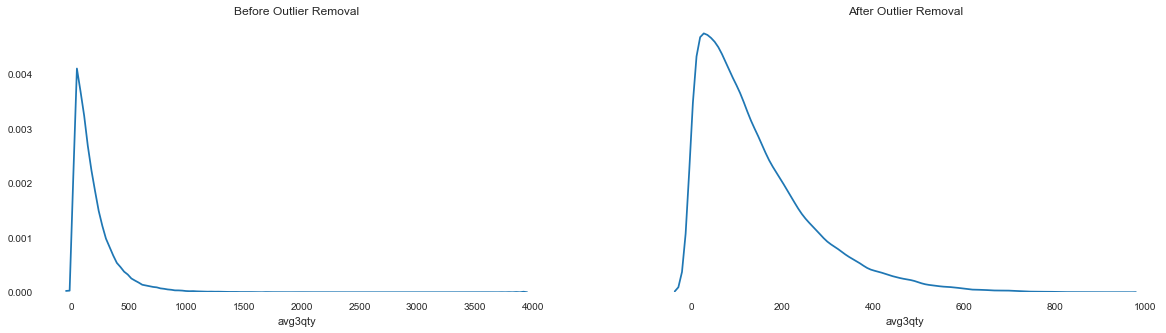

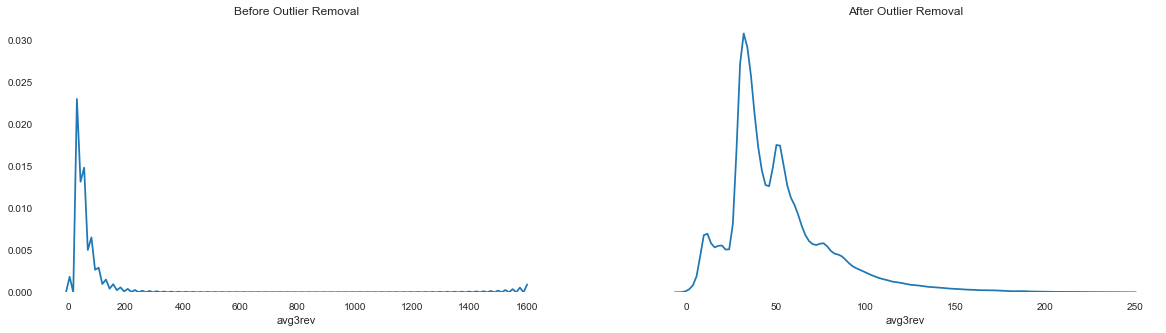

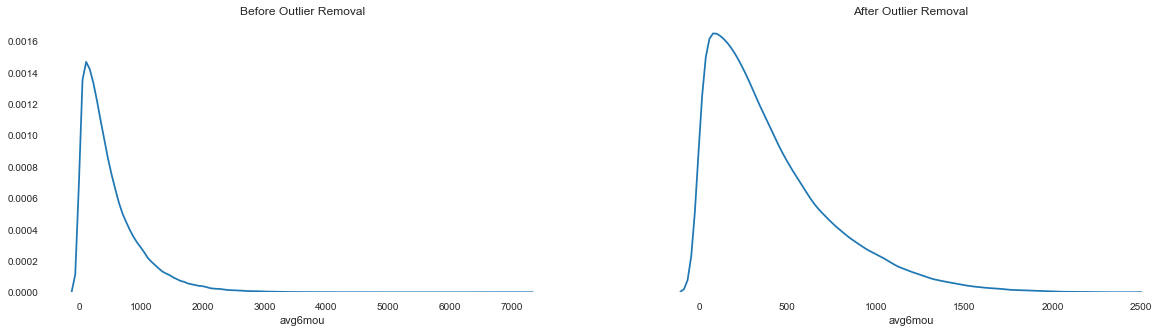

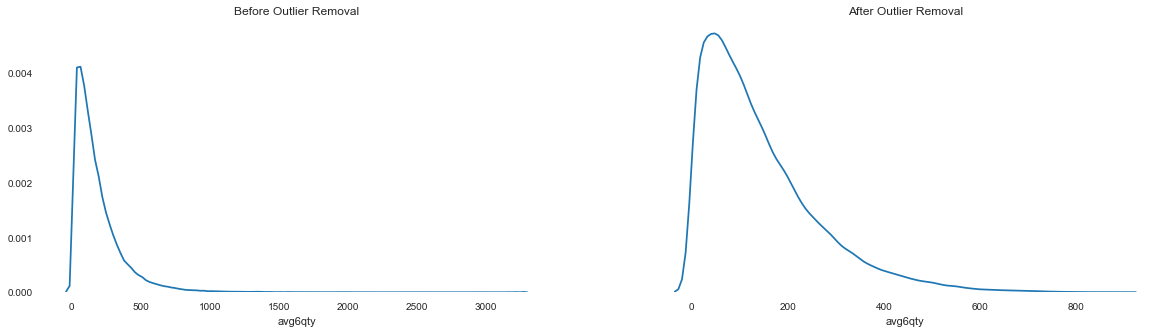

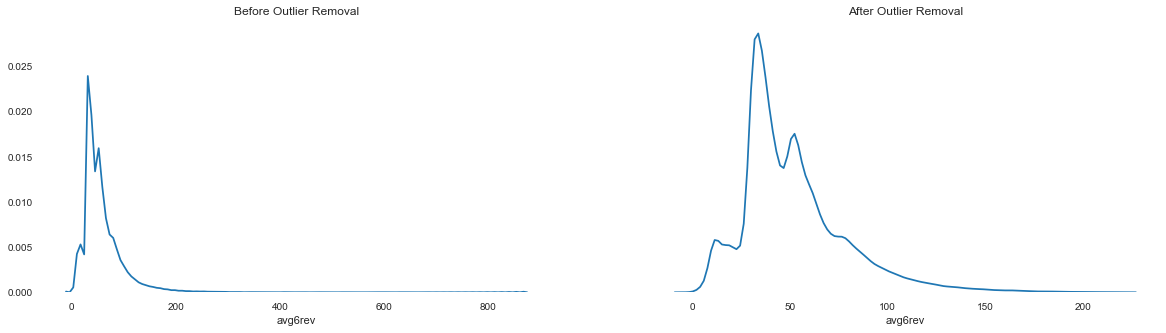

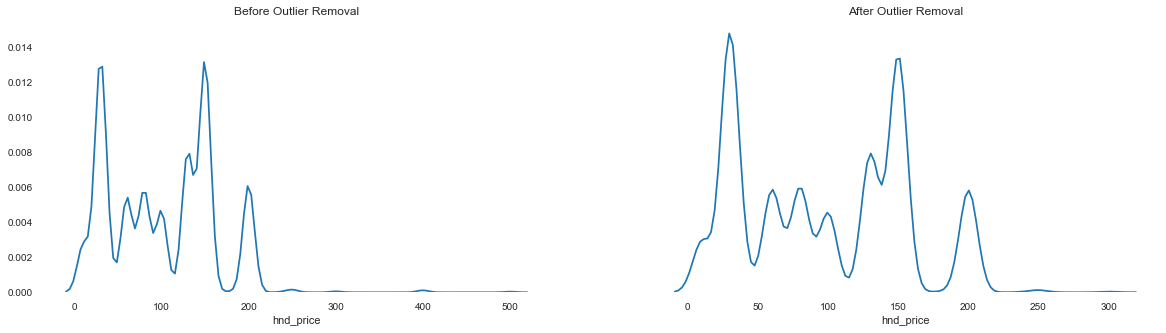

In [16]:
for i, col in enumerate(df_num_zscore.columns):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,5),sharey=True)
    ax1.set_title('Before Outlier Removal') 
    ax2.set_title('After Outlier Removal') 
    sns.distplot(df_no_mv[col], hist=False,ax=ax1)
    sns.distplot(df_num_zscore[col], hist=False,ax =ax2)

In [17]:
#Left merge numerical table to categorical 

cols_to_use = df_no_mv.columns.difference(df_num_zscore.columns)

df_merge= df_num_zscore.merge(df_no_mv[cols_to_use],how='left', left_index=True,right_index=True)
df_merge

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,months,new_cell,numbcars,ownrent,phones,prizm_social_one,refurb_new,rv,truck,uniqsubs
Customer_ID,,,,,,,,,,,,,,,,,,,,,
1000001,23.997500,219.250000,22.50,0.2475,0.000000,0.000000,0.000000,0.00,0.00,-157.250000,...,61,U,3.0,O,2.0,S,N,0.0,0.0,2
1000003,16.990000,10.250000,16.99,0.0000,0.000000,0.000000,0.000000,0.00,0.00,-4.250000,...,58,Y,2.0,O,2.0,S,N,0.0,0.0,1
1000004,38.000000,7.500000,38.00,0.0000,0.000000,0.000000,0.000000,0.00,0.00,-1.500000,...,60,Y,1.0,UN,1.0,T,N,0.0,0.0,1
1000005,55.230000,570.500000,71.98,0.0000,0.000000,0.000000,0.000000,0.00,0.00,38.500000,...,57,Y,1.0,R,6.0,U,N,0.0,0.0,1
1000007,17.145000,0.000000,16.99,0.0000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,...,53,N,0.0,O,4.0,C,N,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099982,34.990000,6.333333,44.99,0.0000,0.000000,0.000000,0.000000,0.00,0.00,-6.333333,...,30,U,0.0,O,3.0,S,N,0.0,0.0,1
1099985,85.150000,815.000000,87.99,0.0000,1.000000,0.390000,0.000000,0.39,0.39,0.000000,...,27,U,2.0,UN,3.0,UN,N,0.0,0.0,3
1099986,71.993333,724.000000,70.00,0.0000,4.333333,1.083333,1.083333,0.00,0.91,-40.000000,...,30,U,0.0,O,1.0,UN,N,0.0,0.0,1


# Convert categorical values to numerical

In [18]:
cat_feat = ['area','crclscod','dualband','ethnic','refurb_new','marital','new_cell','prizm_social_one','ownrent','infobase',
            'numbcars', 'actvsubs','months', 'phones','eqpdays','models','uniqsubs',
           'asl_flag','truck','rv','forgntvl','creditcd' , 'kid0_2', 'kid11_15', 'kid16_17', 'kid3_5', 'kid6_10']

for col in cat_feat:
    print(col)
    print("unique Values :" ,df_merge[col].unique()) # to print categories name only
    print("Value counts of unique values :\n",df_merge[col].value_counts()) # to print count of every category
    print("-----------------------------------------------------------------------------------------")

area
unique Values : ['NORTHWEST/ROCKY MOUNTAIN AREA' 'GREAT LAKES AREA' 'CHICAGO AREA'
 'NEW ENGLAND AREA' 'DALLAS AREA' 'CENTRAL/SOUTH TEXAS AREA'
 'MIDWEST AREA' 'PHILADELPHIA AREA' 'TENNESSEE AREA' 'OHIO AREA'
 'HOUSTON AREA' 'NEW YORK CITY AREA' 'SOUTHWEST AREA'
 'ATLANTIC SOUTH AREA' 'SOUTH FLORIDA AREA' 'CALIFORNIA NORTH AREA'
 'DC/MARYLAND/VIRGINIA AREA' 'NORTH FLORIDA AREA' 'LOS ANGELES AREA']
Value counts of unique values :
 NEW YORK CITY AREA               9153
MIDWEST AREA                     5465
DC/MARYLAND/VIRGINIA AREA        5446
LOS ANGELES AREA                 5416
SOUTHWEST AREA                   5173
ATLANTIC SOUTH AREA              5028
CALIFORNIA NORTH AREA            5014
NEW ENGLAND AREA                 4703
DALLAS AREA                      4628
CHICAGO AREA                     4114
OHIO AREA                        3943
GREAT LAKES AREA                 3898
NORTH FLORIDA AREA               3760
NORTHWEST/ROCKY MOUNTAIN AREA    3706
HOUSTON AREA                 

 U    75845
Y     7654
Name: kid11_15, dtype: int64
-----------------------------------------------------------------------------------------
kid16_17
unique Values : ['U' 'Y']
Value counts of unique values :
 U    74920
Y     8579
Name: kid16_17, dtype: int64
-----------------------------------------------------------------------------------------
kid3_5
unique Values : ['U' 'Y']
Value counts of unique values :
 U    79409
Y     4090
Name: kid3_5, dtype: int64
-----------------------------------------------------------------------------------------
kid6_10
unique Values : ['U' 'Y']
Value counts of unique values :
 U    76438
Y     7061
Name: kid6_10, dtype: int64
-----------------------------------------------------------------------------------------


So we shall convert the nominal categorical values to numerical using one hot encoding and boolean values to 0 and 1

Nominal_Categorical = [ 'area','crclscod','dualband','ethnic','refurb_new','marital',
               'new_cell','prizm_social_one','ownrent','infobase']

Ordinal_Categorical_numericals = ['numbcars', 'actvsubs','months', 'phones','eqpdays','models','uniqsubs']

Boolean = ['asl_flag','truck','rv','forgntvl','creditcd' , 'kid0_2', 'kid11_15', 'kid16_17', 'kid3_5', 'kid6_10']

Target_Variable_boolean =[ 'churn']

In [19]:
#We will be one_hot encoding the catergorical values

df_onehot = pd.get_dummies(data=df_merge, columns=['area','crclscod','dualband','ethnic','refurb_new','marital', 
                                             'new_cell','prizm_social_one','ownrent','infobase'])

cleanup_nums = {"asl_flag":     {"N": 0, "Y": 1},
                   "creditcd": {"Y": 1, "N": 0 },
                   "kid0_2": {"Y": 1, "U": 0 },
                   "kid0_2": {"Y": 1, "U": 0 },
                   "kid3_5": {"Y": 1, "U": 0 },
                   "kid6_10": {"Y": 1, "U": 0 },
                   "kid11_15": {"Y": 1, "U": 0 },
                   "kid16_17": {"Y": 1, "U": 0 }}

df_onehot.replace(cleanup_nums, inplace=True)
df_onehot[['asl_flag','creditcd', 'kid0_2', 'kid11_15', 'kid16_17', 'kid3_5', 'kid6_10']]

,asl_flag,creditcd,kid0_2,kid11_15,kid16_17,kid3_5,kid6_10
Customer_ID,,,,,,,
1000001,0,1,0,0,0,0,0
1000003,0,1,0,0,0,1,0
1000004,0,1,1,0,0,0,0
1000005,0,1,0,0,0,0,0
1000007,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
1099982,0,1,0,0,0,0,1
1099985,0,1,0,0,0,0,0
1099986,0,1,0,0,0,0,0


### For tree based algorithms one hot encoding will increase the complexity. Hence, we Labelencode these features instead of 

In [20]:
#View df_merge
df_merge[['asl_flag','creditcd', 'kid0_2', 'kid11_15', 'kid16_17', 'kid3_5', 'kid6_10']]

,asl_flag,creditcd,kid0_2,kid11_15,kid16_17,kid3_5,kid6_10
Customer_ID,,,,,,,
1000001,N,Y,U,U,U,U,U
1000003,N,Y,U,U,U,Y,U
1000004,N,Y,Y,U,U,U,U
1000005,N,Y,U,U,U,U,U
1000007,N,Y,U,U,U,U,U
...,...,...,...,...,...,...,...
1099982,N,Y,U,U,U,U,Y
1099985,N,Y,U,U,U,U,U
1099986,N,Y,U,U,U,U,U


In [21]:
df_boolean = df_merge.copy(deep=True)

cleanup_nums = {"asl_flag":     {"N": 0, "Y": 1},
                   "creditcd": {"Y": 1, "N": 0 },
                   "kid0_2": {"Y": 1, "U": 0 },
                   "kid0_2": {"Y": 1, "U": 0 },
                   "kid3_5": {"Y": 1, "U": 0 },
                   "kid6_10": {"Y": 1, "U": 0 },
                   "kid11_15": {"Y": 1, "U": 0 },
                   "kid16_17": {"Y": 1, "U": 0 }}

df_boolean.replace(cleanup_nums, inplace=True)
df_boolean[['asl_flag','creditcd', 'kid0_2', 'kid11_15', 'kid16_17', 'kid3_5', 'kid6_10']]

#label encoder other categorical value
df_label = df_merge.apply(LabelEncoder().fit_transform)
df_label

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,months,new_cell,numbcars,ownrent,phones,prizm_social_one,refurb_new,rv,truck,uniqsubs
Customer_ID,,,,,,,,,,,,,,,,,,,,,
1000001,3407,999,989,1,0,0,0,0,0,2287,...,54,1,3,0,1,2,0,0,0,1
1000003,1833,51,583,0,0,0,0,0,0,2983,...,51,2,2,0,1,2,0,0,0,0
1000004,7945,37,2522,0,0,0,0,0,0,2999,...,53,2,1,2,0,3,0,0,0,0
1000005,14233,2487,5363,0,0,0,0,0,0,3206,...,50,2,1,1,5,4,0,0,0,0
1000007,1866,0,583,0,0,0,0,0,0,3008,...,46,0,0,0,3,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099982,6768,32,3273,0,0,0,0,0,0,2971,...,23,1,0,0,2,2,0,0,0,0
1099985,22953,3499,5973,0,6,57,0,26,54,3008,...,20,1,2,2,2,5,0,0,0,2
1099986,19582,3131,5257,0,27,195,122,0,200,2803,...,23,1,0,0,0,5,0,0,0,0


## Normalizing the data

## Conclusion

The data is cleaned and ready for modelling

In [22]:
df_onehot.to_csv("Cleaned Data Linear.csv")

Tree based algorithms work good with categorical features, so we can end the data cleaning an use it for tree based algorithm

In [23]:
df_label.to_csv("Cleaned Data Tree.csv")